In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import files
path = "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt"
df = pd.read_csv(path, sep=r"\s+", header=None, names=["index", "feature"])
feature_names = df.loc[:, "feature"]

# indices of final set of features after performing feature engineering
selected_indices = [
    2, 3, 4, 6, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
    41, 42, 43, 44, 45, 46, 56, 58, 59, 63, 64, 65, 66, 70, 74, 78, 79, 80,
    81, 82, 83, 107, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120,
    205, 210, 212, 213, 236, 237, 238, 239, 244, 248, 249, 251, 252,
    262, 263, 264, 265, 278, 279, 280, 291, 292, 293, 294, 295, 296,
    297, 298, 299, 300, 301, 302, 307, 338, 357, 358, 359, 370, 371,
    372, 374, 376, 378, 380, 436, 437, 438, 449, 450, 451, 452, 453,
    454, 455, 457, 459, 507, 512, 513, 514, 520, 525, 526, 527, 533,
    538, 539, 540, 546, 551, 552, 553, 555, 556, 557, 558
]

# Convert to zero-based indexing:
selected_indices = [i-1 for i in selected_indices]

# final set of features after performing feature engineering
features = feature_names.iloc[selected_indices].values

print("Number of features after feature engineering:", features.shape[0])

Number of features after feature engineering: 131


In [ ]:
# Keeps only features in X training set that reflect final features
X_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt", sep=r"\s+", header=None)
X_train = X_train.iloc[:, selected_indices]
X_train.columns = features

print("Number of rows in X_train:", X_train.shape[0])
print("Number of columns in X_train:", X_train.shape[1])
print()

# extract the activity labels
activity_df = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/activity_labels.txt", sep=r"\s+", header = None)

# load the y training set and create a new column for the categorical labels of
# activity
y_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt",
                      header=None,
                      names=["Activity Label"])

y_train['Activity'] = y_train['Activity Label'].map({
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
})

print("Number of rows in y_train:", y_train.shape[0])
print("Number of columns in y_train:", y_train.shape[1])
print()

y_train.head(10)

Number of rows in X_train: 7352
Number of columns in X_train: 131

Number of rows in y_train: 7352
Number of columns in y_train: 2



,Activity Label,Activity
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING
5,5,STANDING
6,5,STANDING
7,5,STANDING
8,5,STANDING
9,5,STANDING


In [ ]:
# Keeps only features in y training set that reflect final features
X_test = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt", sep=r"\s+", header=None)
X_test = X_test.iloc[:, selected_indices]
X_test.columns = features

print("Number of rows in X_test:", X_test.shape[0])
print("Number of columns in X_test:", X_test.shape[1])
print()

# Load test labels
y_test = pd.read_csv(
    "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt",
    header=None, names=["Activity Label"])

# load the y training set and create a new column for the categorical labels of
# activity
y_test["Activity"] = y_test["Activity Label"].map({
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
})

print("Number of rows in y_test:", y_test.shape[0])
print("Number of columns in y_test:", y_test.shape[1])

Number of rows in X_test: 2947
Number of columns in X_test: 131

Number of rows in y_test: 2947
Number of columns in y_test: 2


In [ ]:
print(y_train["Activity"].value_counts())

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


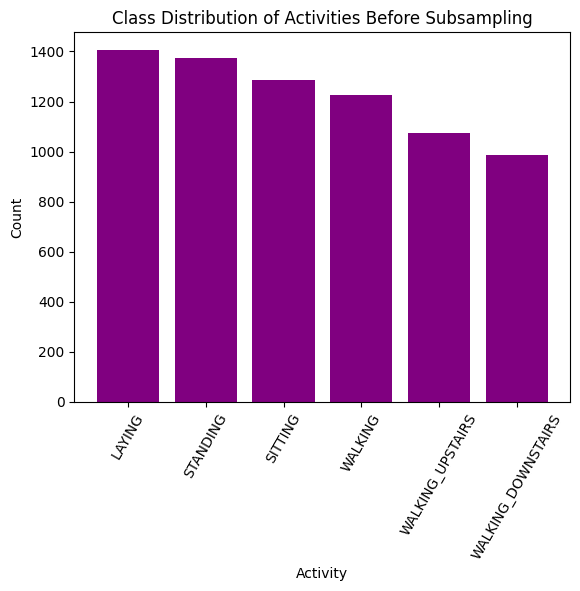

In [ ]:
# plots the counts of each class (roughly balanced, but can still be addressed)
counts = y_train["Activity"].value_counts()
plt.bar(counts.index, counts.values, color = 'purple')
plt.title("Class Distribution of Activities Before Subsampling")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the Logisitic Regression model
lr_model = LogisticRegression(max_iter = 150)
lr_model.fit(X_train_scaled, y_train['Activity'])

# make predictions on the scaled testing set using the Logisitic Regression
# model
predictions = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test['Activity'], predictions)
print("Accuracy:", round(accuracy, 3))
print()

print(classification_report(y_test["Activity"], predictions))

Accuracy: 0.932

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.89      0.88      0.88       491
          STANDING       0.88      0.91      0.90       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.95      0.96      0.96       420
  WALKING_UPSTAIRS       0.94      0.89      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [ ]:
# address class imbalance by subsampling (creating subset of activity labels with 986)
min_count_label = y_train['Activity'].value_counts().min()

# subsample each class
y_subsampled = y_train.groupby('Activity').sample(n = min_count_label,
                                                   random_state = 50)
X_subsampled = X_train.loc[y_subsampled.index]

print(y_subsampled['Activity'].value_counts())

Activity
LAYING                986
SITTING               986
STANDING              986
WALKING               986
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS      986
Name: count, dtype: int64


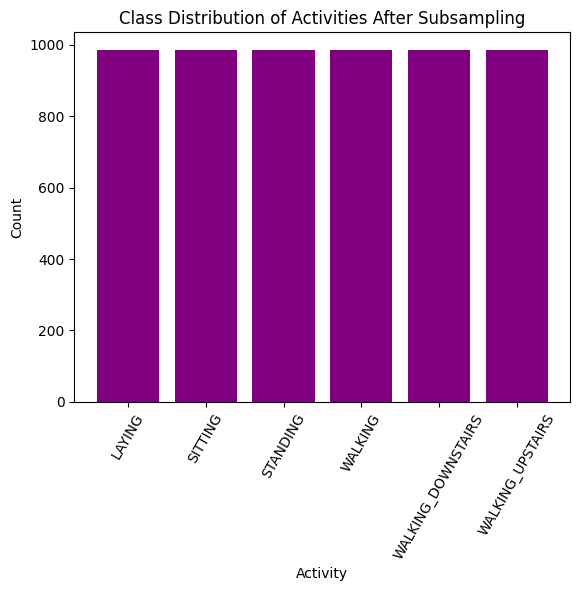

In [ ]:
# plots the counts of each class AFTER subsampling
counts = y_subsampled['Activity'].value_counts()
plt.bar(counts.index, counts.values, color = 'purple')
plt.title("Class Distribution of Activities After Subsampling")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_subsampled)
X_test_scaled = scaler.fit_transform(X_test)

# Train the Logisitic Regression model
lr_model = LogisticRegression(max_iter = 150)
lr_model.fit(X_train_scaled, y_subsampled['Activity'])

# make predictions on the scaled testing set using the Logisitic Regression
# model
predictions = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test['Activity'], predictions)
print("Accuracy:", round(accuracy, 3))
print()

print(classification_report(y_test["Activity"], predictions))

Accuracy: 0.925

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.86      0.92      0.89       532
           WALKING       0.93      0.96      0.94       496
WALKING_DOWNSTAIRS       0.93      0.98      0.95       420
  WALKING_UPSTAIRS       0.94      0.88      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



### **Logistic Regression Model Training (Base Dataset)**





In [ ]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the Logisitic Regression model
lr_model = LogisticRegression(max_iter = 150)
lr_model.fit(X_train_scaled, y_train['Activity'])

# make predictions on the scaled testing set using the Logisitic Regression
# model
predictions = lr_model.predict(X_test_scaled)

# print predictions of LR model
print("Predictions made by the LR model on testing set:", predictions)
print()

Predictions made by the LR model on testing set: ['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']



##**Logistic Regresion with Weighted Classes**
Before best parameters

In [ ]:
# Assuming X_train and y_train are your training data and labels
# Calculate class frequencies (optional, for guidance)
unique_classes, class_counts = np.unique(y_train['Activity'], return_counts=True)


print(class_counts)

[1407 1286 1374 1226  986 1073]


Predictions made by the LR model on testing set after balancing: ['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']

Accuracy of predictions by Logistic Regression model on testing set after balancing: 0.929

Confusion Matrix: 


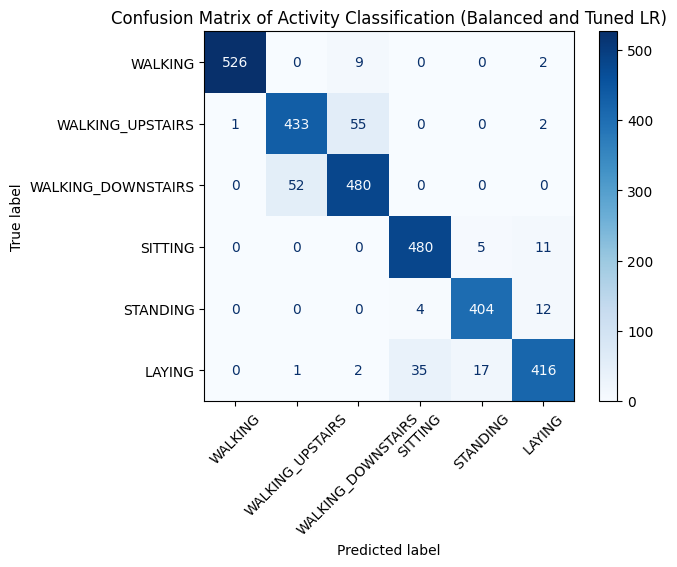


Classification Report of F1-Score and Per-Class Recall for LR Model after tuning/balancing:
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.89      0.88      0.89       491
          STANDING       0.88      0.90      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.95      0.96      0.96       420
  WALKING_UPSTAIRS       0.94      0.88      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [ ]:
# Train the Logisitic Regression model
lr_model_balanced = LogisticRegression(
    C=1,               # from grid_search.best_params_
    penalty="l2",      # from grid_search.best_params_
    solver="saga",     # from grid_search.best_params_
    max_iter=1000,      # a bit higher so saga converges
    class_weight='balanced' #ADDING BALANCED CLASS WEIGHT
)
lr_model_balanced.fit(X_train_scaled, y_train['Activity'])

# make predictions on the scaled testing set using the Logisitic Regression
# model
predictions_balanced = lr_model_balanced.predict(X_test_scaled)

# print predictions of LR model
print("Predictions made by the LR model on testing set after balancing:",
      predictions_balanced)
print()

# evaluate accuracy of LR model after hyperparameter tuning
accuracy_balanced = accuracy_score(y_test['Activity'], predictions_balanced)
print("Accuracy of predictions by Logistic Regression model on testing set "
+ "after balancing:", round(accuracy_balanced, 3))
print()

# Confusion Matrix of LR model after hyperparameter tuning
print("Confusion Matrix: ")
conf_matrix_balanced = confusion_matrix(y_test['Activity'], predictions_balanced)

display_balanced = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_balanced,
                                 display_labels = [
                                     "WALKING", "WALKING_UPSTAIRS",
                                     "WALKING_DOWNSTAIRS","SITTING", "STANDING",
                                     "LAYING"])

display_balanced.plot(cmap = "Blues", xticks_rotation=45)
plt.title("Confusion Matrix of Activity Classification (Balanced and Tuned LR)")
plt.show()
print()


# F1-score and per-class recall of LR model after hyperparameter tuning
print("Classification Report of F1-Score and Per-Class Recall for LR Model "
+ "after tuning/balancing:")
print(classification_report(y_test["Activity"], predictions_balanced))


###**Logistic Regression Model Evaluation**

Evaluation Metrics of LR Model **Before** Hyperparameter Tuning:


Accuracy of predictions by Logistic Regression model on testing set: 0.925

Confusion Matrix: 


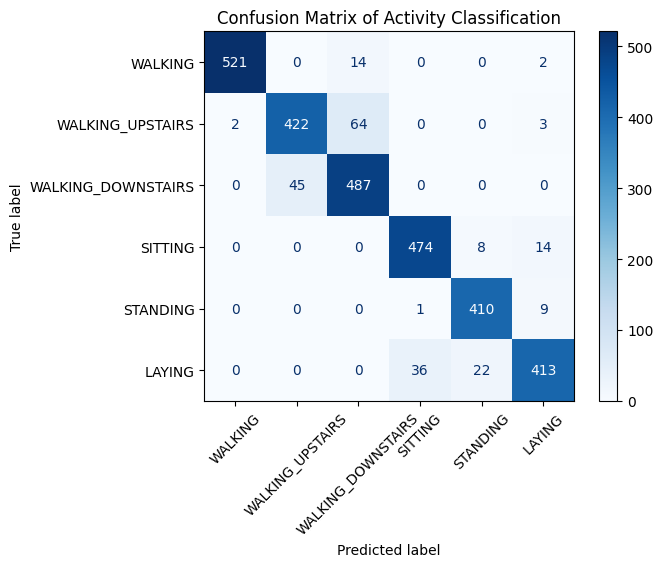


Classification Report of F1-Score and Per-Class Recall for LR Model:
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.86      0.92      0.89       532
           WALKING       0.93      0.96      0.94       496
WALKING_DOWNSTAIRS       0.93      0.98      0.95       420
  WALKING_UPSTAIRS       0.94      0.88      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [ ]:
# evaluate accuracy of LR model before hyperparameter tuning
accuracy = accuracy_score(y_test['Activity'], predictions)
print("Accuracy of predictions by Logistic Regression model on testing set:",
      round(accuracy, 3))
print()

# Confusion Matrix of LR model before hyperparameter tuning
print("Confusion Matrix: ")
conf_matrix = confusion_matrix(y_test['Activity'], predictions)

display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,
                                 display_labels = [
                                     "WALKING", "WALKING_UPSTAIRS",
                                     "WALKING_DOWNSTAIRS","SITTING", "STANDING",
                                     "LAYING"])

display.plot(cmap = "Blues", xticks_rotation=45)
plt.title("Confusion Matrix of Activity Classification")
plt.show()
print()


# F1-score and per-class recall of LR model before hyperparameter tuning
print("Classification Report of F1-Score and Per-Class Recall for LR Model:")
print(classification_report(y_test["Activity"], predictions))

Evaluation Metrics of LR Model **After** Hyperparameter Tuning:

In [ ]:
# for hyperparameter tuning + k-fold cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

# Define the parameter grid
param_grid = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__penalty": ["l2"],
    # these two solvers both handle multiclass well
    "clf__solver": ["lbfgs", "saga"],
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train["Activity"])

print("Best params:", grid_search.best_params_)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}


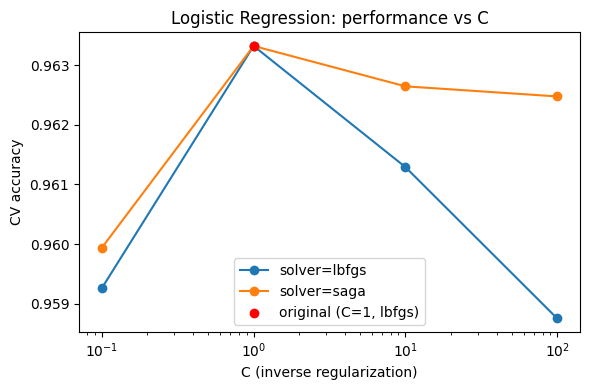

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)

df_plot = cv_res[cv_res["param_clf__penalty"] == "l2"].copy()

plt.figure(figsize=(6,4))
for solver in ["lbfgs", "saga"]:
    sub = df_plot[df_plot["param_clf__solver"] == solver]
    plt.plot(
        sub["param_clf__C"],
        sub["mean_test_score"],
        marker="o",
        label=f"solver={solver}"
    )

plt.scatter([1.0], [df_plot[(df_plot["param_clf__C"]==1.0) &
                             (df_plot["param_clf__solver"]=="lbfgs")]["mean_test_score"].values[0]],
            color="red", zorder=5, label="original (C=1, lbfgs)")
plt.xscale("log")  # C is on log scale
plt.xlabel("C (inverse regularization)")
plt.ylabel("CV accuracy")
plt.title("Logistic Regression: performance vs C")
plt.legend()
plt.tight_layout()
plt.show()


Predictions made by the LR model on testing set after tuning: ['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']

Accuracy of predictions by Logistic Regression model on testing set after tuning: 0.925

Confusion Matrix: 


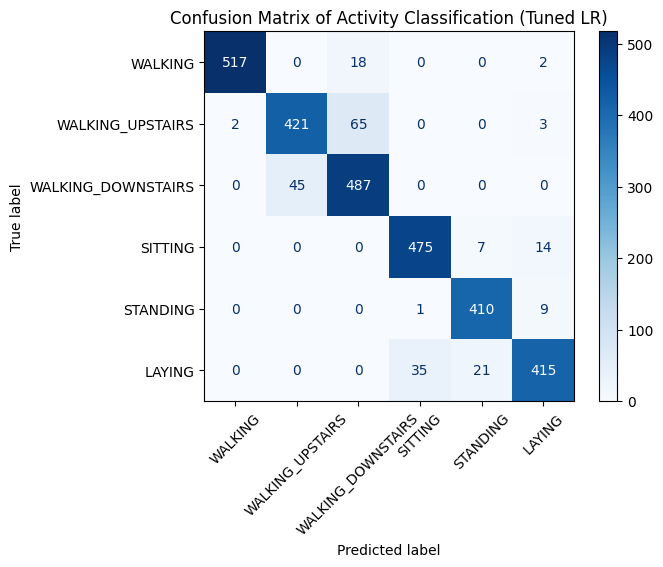


Classification Report of F1-Score and Per-Class Recall for LR Model after tuning:
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.85      0.92      0.88       532
           WALKING       0.93      0.96      0.94       496
WALKING_DOWNSTAIRS       0.94      0.98      0.96       420
  WALKING_UPSTAIRS       0.94      0.88      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.92      0.92      2947



In [ ]:
lr_model_after = LogisticRegression(
    C=1,               # from grid_search.best_params_
    penalty="l2",      # from grid_search.best_params_
    solver="saga",     # from grid_search.best_params_
    max_iter=1000,      # a bit higher so saga converges
    class_weight=None
)
lr_model_after.fit(X_train_scaled, y_train['Activity'])

# make predictions on the scaled testing set using the Logisitic Regression
# model
predictions_after = lr_model_after.predict(X_test_scaled)

# print predictions of LR model
print("Predictions made by the LR model on testing set after tuning:",
      predictions_after)
print()


# evaluate accuracy of LR model after hyperparameter tuning
accuracy_after = accuracy_score(y_test['Activity'], predictions_after)
print("Accuracy of predictions by Logistic Regression model on testing set "
+ "after tuning:", round(accuracy_after, 3))
print()

# Confusion Matrix of LR model after hyperparameter tuning
print("Confusion Matrix: ")
conf_matrix_after = confusion_matrix(y_test['Activity'], predictions_after)

display_after = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_after,
                                 display_labels = [
                                     "WALKING", "WALKING_UPSTAIRS",
                                     "WALKING_DOWNSTAIRS","SITTING", "STANDING",
                                     "LAYING"])

display_after.plot(cmap = "Blues", xticks_rotation=45)
plt.title("Confusion Matrix of Activity Classification (Tuned LR)")
plt.show()
print()


# F1-score and per-class recall of LR model after hyperparameter tuning
print("Classification Report of F1-Score and Per-Class Recall for LR Model "
+ "after tuning:")
print(classification_report(y_test["Activity"], predictions_after))


##**Weighted Logistic Regression after tuning**

In [ ]:
# Assuming X_train and y_train are your training data and labels
# Calculate class frequencies (optional, for guidance)
unique_classes, class_counts = np.unique(y_train['Activity'], return_counts=True)


print(class_counts)

[1407 1286 1374 1226  986 1073]


Predictions made by the LR model on testing set after balancing: ['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']

Accuracy of predictions by Logistic Regression model on testing set after balancing: 0.929

Confusion Matrix: 


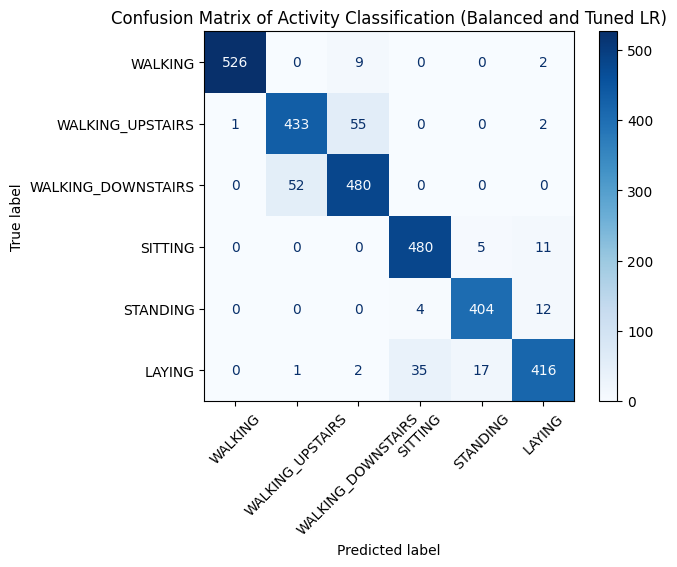


Classification Report of F1-Score and Per-Class Recall for LR Model after tuning/balancing:
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.89      0.88      0.89       491
          STANDING       0.88      0.90      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.95      0.96      0.96       420
  WALKING_UPSTAIRS       0.94      0.88      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [ ]:
# Train the Logisitic Regression model
lr_model_after = LogisticRegression(
    C=1,               # from grid_search.best_params_
    penalty="l2",      # from grid_search.best_params_
    solver="saga",     # from grid_search.best_params_
    max_iter=1000,      # a bit higher so saga converges
    class_weight='balanced' # balancing weights
)
lr_model_balanced.fit(X_train_scaled, y_train['Activity'])

# make predictions on the scaled testing set using the Logisitic Regression
# model
predictions_balanced = lr_model_balanced.predict(X_test_scaled)

# print predictions of LR model
print("Predictions made by the LR model on testing set after balancing:",
      predictions_balanced)
print()

# evaluate accuracy of LR model after hyperparameter tuning
accuracy_balanced = accuracy_score(y_test['Activity'], predictions_balanced)
print("Accuracy of predictions by Logistic Regression model on testing set "
+ "after balancing:", round(accuracy_balanced, 3))
print()

# Confusion Matrix of LR model after hyperparameter tuning
print("Confusion Matrix: ")
conf_matrix_balanced = confusion_matrix(y_test['Activity'], predictions_balanced)

display_balanced = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_balanced,
                                 display_labels = [
                                     "WALKING", "WALKING_UPSTAIRS",
                                     "WALKING_DOWNSTAIRS","SITTING", "STANDING",
                                     "LAYING"])

display_balanced.plot(cmap = "Blues", xticks_rotation=45)
plt.title("Confusion Matrix of Activity Classification (Balanced and Tuned LR)")
plt.show()
print()


# F1-score and per-class recall of LR model after hyperparameter tuning
print("Classification Report of F1-Score and Per-Class Recall for LR Model "
+ "after tuning/balancing:")
print(classification_report(y_test["Activity"], predictions_balanced))
